# Data Pre-Processing Assignment

### Brayan Gutierrez, Katie To, Jericka Ledezma
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Reading Data

In [2]:
ground_water = pd.read_csv("ground_water_quality_2022_post.csv")
ground_water_df = pd.DataFrame(ground_water)
print(ground_water_df)

      sno  district       mandal      village  lat_gis  long_gis  RL_GIS  \
0       1  ADILABAD     Adilabad     Adilabad    78.52     19.67   253.0   
1       2  ADILABAD  Bazarhatnur  Bazarhatnur    78.35     19.46   435.0   
2       3  ADILABAD         Bela   Chandpally    78.85     19.68   247.0   
3       4  ADILABAD     Bheempur         Arli    78.38     19.83   224.0   
4       5  ADILABAD     Bheempur     Bheempur    78.42     19.77   245.0   
...   ...       ...          ...          ...      ...       ...     ...   
1019   31   YADADRI    Valigonda   T. somaram    78.95     17.40   339.0   
1020   32   YADADRI    Valigonda  Varkatpally    78.93     17.34   339.0   
1021   33   YADADRI    Valigonda  Vemulakonda    79.14     17.35   265.0   
1022   34   YADADRI      Y.Gutta   Mallapuram    78.91     17.63   439.0   
1023   35   YADADRI      Y.Gutta   Motakondur    79.03     17.55   342.0   

                 season    pH     E.C  ...    SO4     Na     K     Ca    Mg  \
0     Po

## Data Cleaning
***

In [3]:
ground_water_df['pH'] = pd.to_numeric(ground_water_df['pH'], errors='coerce')
ground_water_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               368 non-null    int64  
 1   district          368 non-null    object 
 2   mandal            368 non-null    object 
 3   village           368 non-null    object 
 4   lat_gis           368 non-null    float64
 5   long_gis          368 non-null    float64
 6   gwl               365 non-null    float64
 7   season            368 non-null    object 
 8   pH                367 non-null    float64
 9   E.C               368 non-null    int64  
 10  TDS               368 non-null    float64
 11  CO3               368 non-null    float64
 12  HCO3              368 non-null    int64  
 13  Cl                368 non-null    int64  
 14  F                 368 non-null    float64
 15  NO3               368 non-null    float64
 16  SO4               368 non-null    float64
 1

### Separating Numeric and Non-numeric Columns

In [4]:
ground_water_df = ground_water_df.rename(columns = {'NO3 ': 'NO3'})
ground_water_df = ground_water_df.rename(columns = {'RSC  meq  / L': 'RSC'})
numeric = ground_water_df.select_dtypes(include=['number']).columns
nonnumeric = ground_water_df.select_dtypes(exclude=['number']).columns

print(numeric)
print(nonnumeric)

Index(['sno', 'lat_gis', 'long_gis', 'gwl', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3',
       'Cl', 'F', 'NO3', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC'],
      dtype='object')
Index(['district', 'mandal', 'village', 'season', 'Classification',
       'Classification.1'],
      dtype='object')


### Finding Missing Data

In [5]:
ground_water_df[nonnumeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   district          368 non-null    object
 1   mandal            368 non-null    object
 2   village           368 non-null    object
 3   season            368 non-null    object
 4   Classification    368 non-null    object
 5   Classification.1  368 non-null    object
dtypes: object(6)
memory usage: 17.4+ KB


In [6]:
ground_water_df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       368 non-null    int64  
 1   lat_gis   368 non-null    float64
 2   long_gis  368 non-null    float64
 3   gwl       365 non-null    float64
 4   pH        367 non-null    float64
 5   E.C       368 non-null    int64  
 6   TDS       368 non-null    float64
 7   CO3       368 non-null    float64
 8   HCO3      368 non-null    int64  
 9   Cl        368 non-null    int64  
 10  F         368 non-null    float64
 11  NO3       368 non-null    float64
 12  SO4       368 non-null    float64
 13  Na        368 non-null    float64
 14  K         368 non-null    float64
 15  Ca        368 non-null    float64
 16  Mg        368 non-null    float64
 17  T.H       368 non-null    float64
 18  SAR       368 non-null    float64
 19  RSC       368 non-null    float64
dtypes: float64(16), int64(4)
memory 

### One missing value in pH, so we will fill that missing value in with the median

In [7]:
df_copy = ground_water_df.copy()
med = df_copy[numeric].median()
ground_water_df[numeric] = df_copy[numeric].fillna(med)
ground_water_df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       368 non-null    int64  
 1   lat_gis   368 non-null    float64
 2   long_gis  368 non-null    float64
 3   gwl       368 non-null    float64
 4   pH        368 non-null    float64
 5   E.C       368 non-null    int64  
 6   TDS       368 non-null    float64
 7   CO3       368 non-null    float64
 8   HCO3      368 non-null    int64  
 9   Cl        368 non-null    int64  
 10  F         368 non-null    float64
 11  NO3       368 non-null    float64
 12  SO4       368 non-null    float64
 13  Na        368 non-null    float64
 14  K         368 non-null    float64
 15  Ca        368 non-null    float64
 16  Mg        368 non-null    float64
 17  T.H       368 non-null    float64
 18  SAR       368 non-null    float64
 19  RSC       368 non-null    float64
dtypes: float64(16), int64(4)
memory 

## Outlier Detection

### We will be using histograms and boxplots for each numeric variable to determine any possible outliers:

#### Serial Number (sno)

<Axes: >

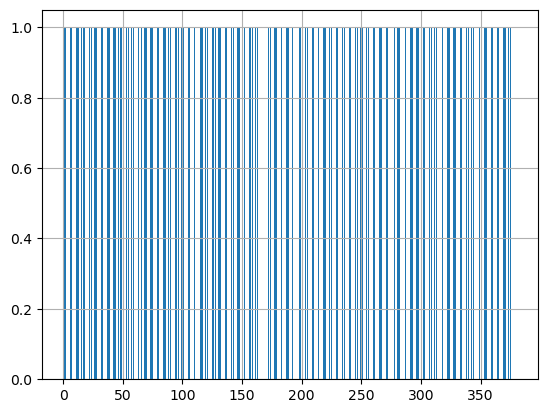

In [8]:
ground_water_df['sno'].hist(bins = 1000)

<Axes: >

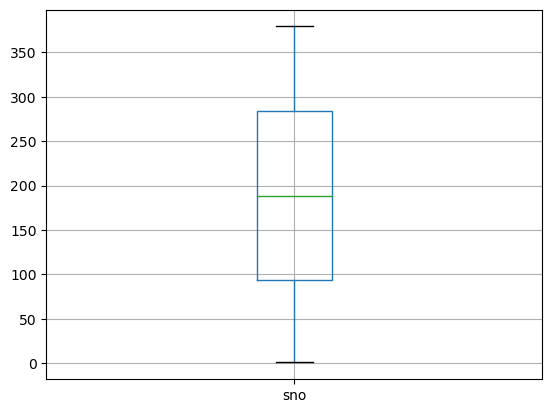

In [9]:
ground_water_df.boxplot(column=['sno'])

#### Lattitude (lat_gis)

<Axes: >

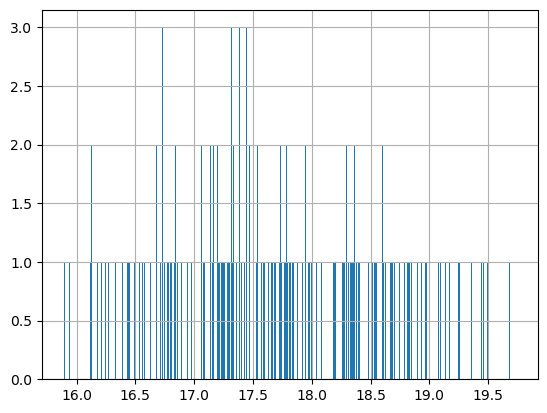

In [10]:
ground_water_df['lat_gis'].hist(bins = 1000)

<Axes: >

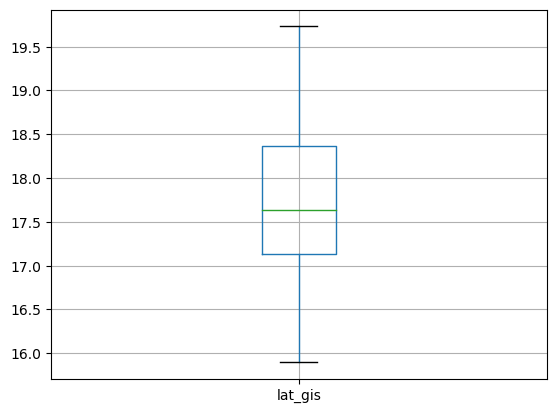

In [11]:
ground_water_df.boxplot(column=['lat_gis'])

#### Longitude (long_gis)

<Axes: >

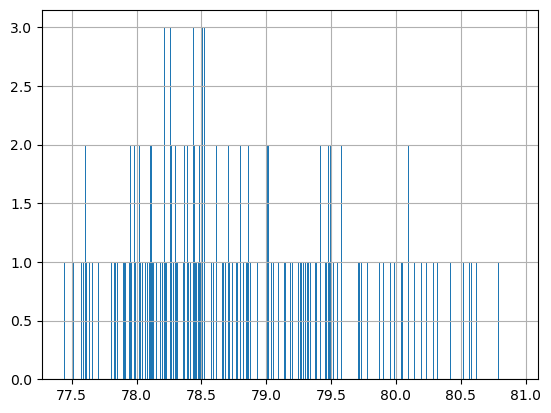

In [12]:
ground_water_df['long_gis'].hist(bins = 1000)

<Axes: >

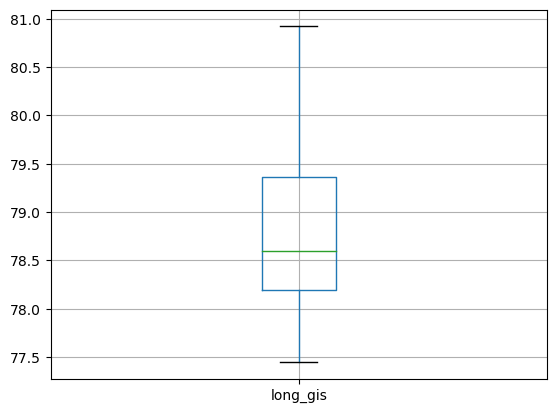

In [13]:
ground_water_df.boxplot(column=['long_gis'])

#### Ground Water Level (gwl)

<Axes: >

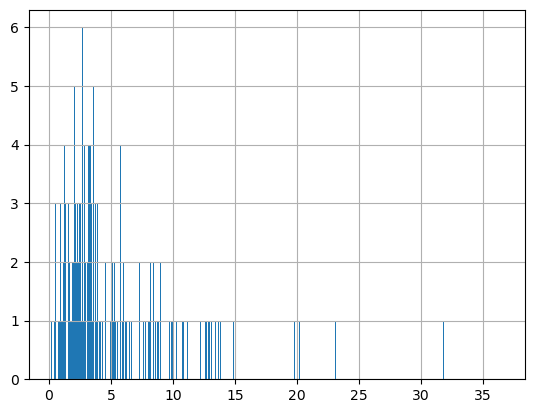

In [14]:
ground_water_df['gwl'].hist(bins = 1000)

<Axes: >

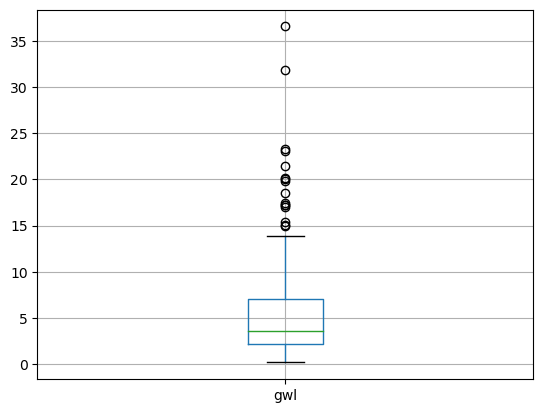

In [15]:
ground_water_df.boxplot(column=['gwl'])

#### pH

<Axes: >

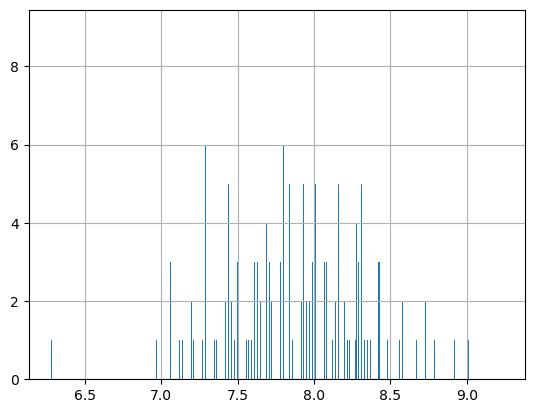

In [16]:
ground_water_df['pH'].hist(bins = 1000)

<Axes: >

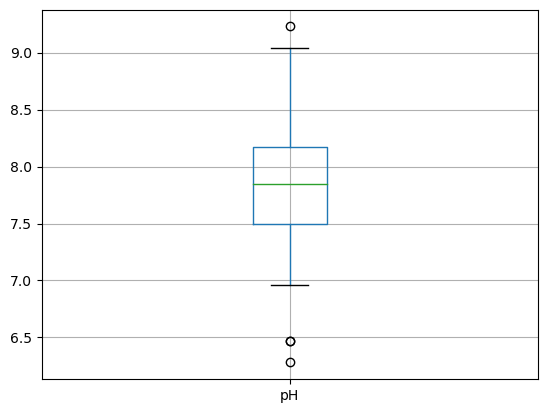

In [17]:
ground_water_df.boxplot(column=['pH'])

#### Electrical Conductivity (E.C)

<Axes: >

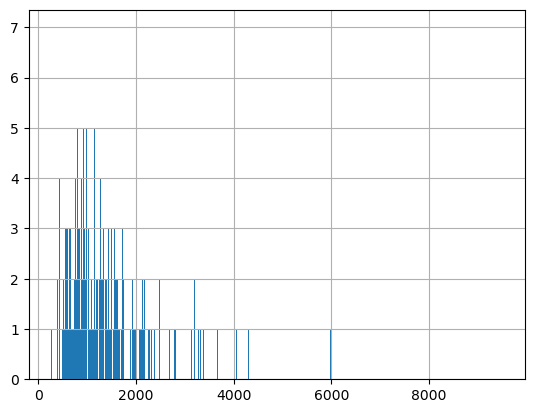

In [18]:
ground_water_df['E.C'].hist(bins = 1000)

<Axes: >

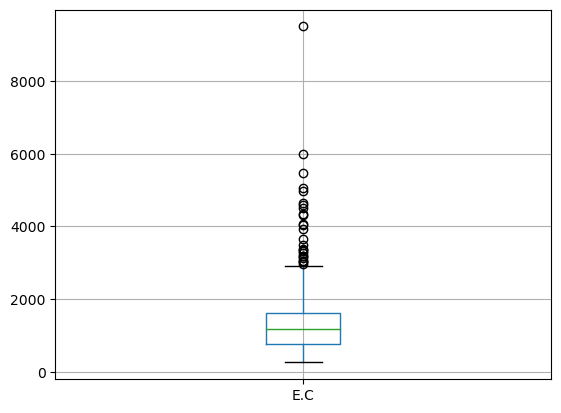

In [19]:
ground_water_df.boxplot(column=['E.C'])

#### Total Dissolved Solids (TDS)

<Axes: >

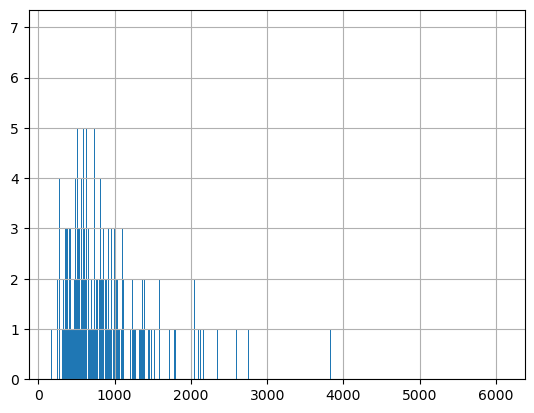

In [20]:
ground_water_df['TDS'].hist(bins = 1000)

<Axes: >

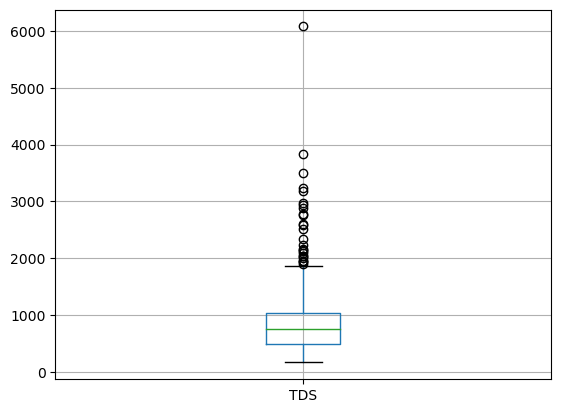

In [21]:
ground_water_df.boxplot(column=['TDS'])

#### Carbonate Present (CO3)

<Axes: >

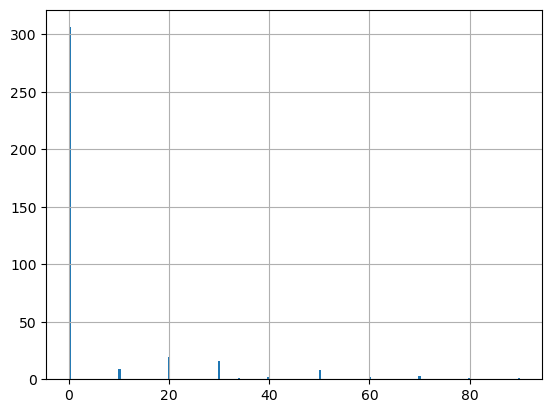

In [22]:
ground_water_df['CO3'].hist(bins = 200)

<Axes: >

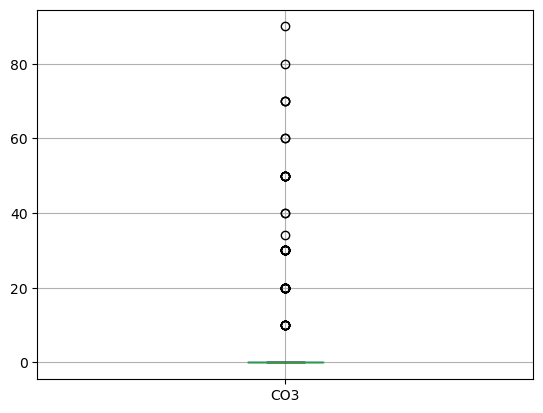

In [37]:
ground_water_df.boxplot(column=['CO3'])

#### Bicarbonate Present (HCO3)

<Axes: >

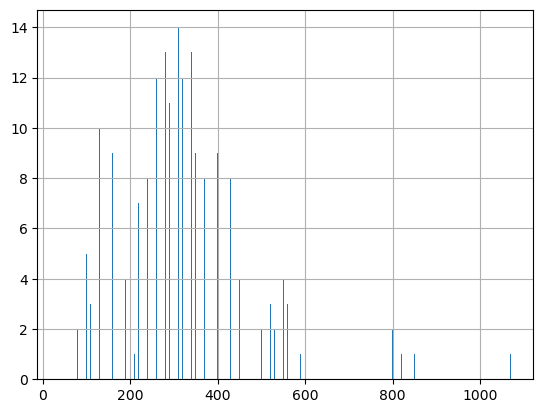

In [23]:
ground_water_df['HCO3'].hist(bins = 1000)

<Axes: >

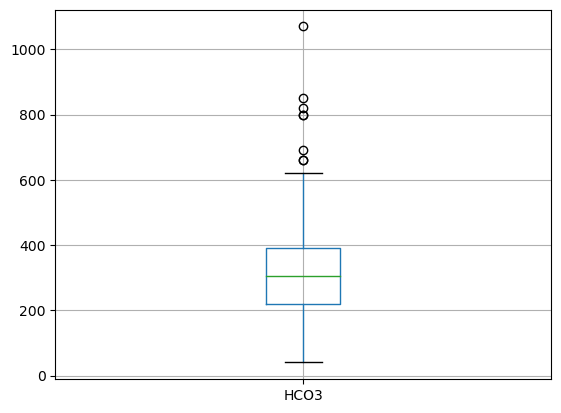

In [38]:
ground_water_df.boxplot(column=['HCO3'])

#### Chloride Present (Cl)

<Axes: >

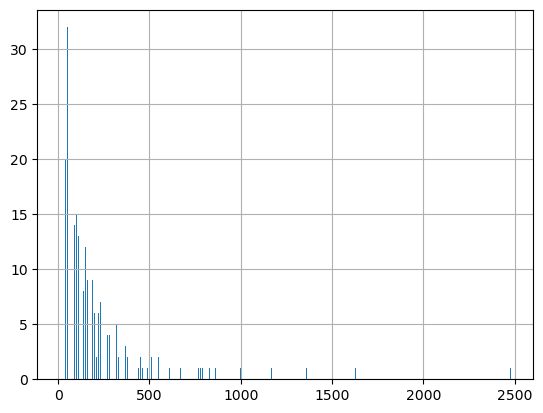

In [24]:
ground_water_df['Cl'].hist(bins = 1000)

<Axes: >

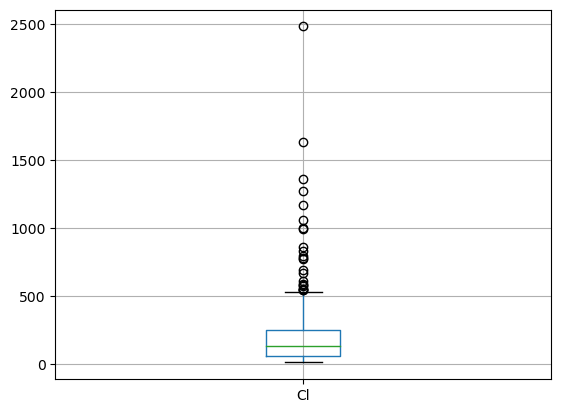

In [41]:
ground_water_df.boxplot(column=['Cl'])

#### Flouride Present (F)

<Axes: >

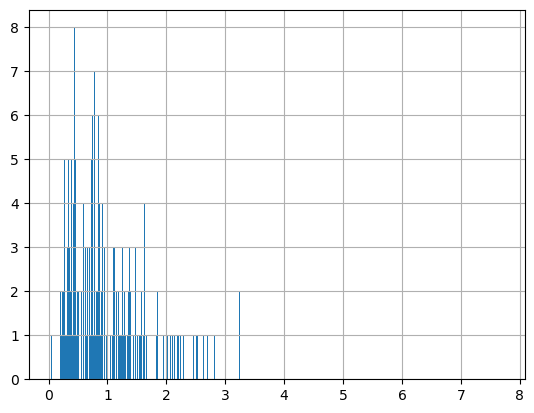

In [25]:
ground_water_df['F'].hist(bins = 1000)

<Axes: >

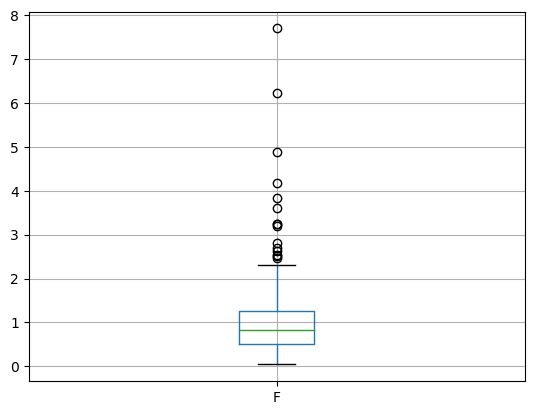

In [42]:
ground_water_df.boxplot(column=['F'])

#### Nitrate Present (NO3)

<Axes: >

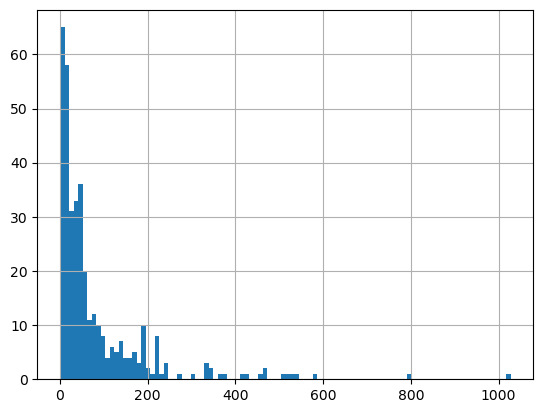

In [26]:
ground_water_df['NO3'].hist(bins = 100)

<Axes: >

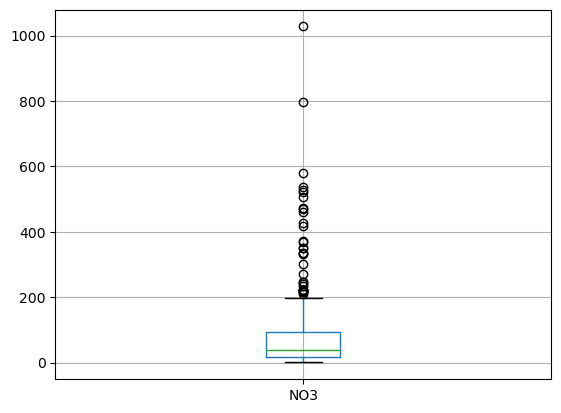

In [27]:
ground_water_df.boxplot(column=['NO3'])

#### Sulphate Present (SO4)

<Axes: >

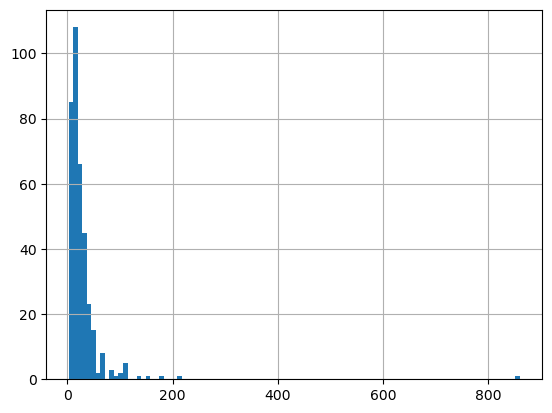

In [28]:
ground_water_df['SO4'].hist(bins = 100)

<Axes: >

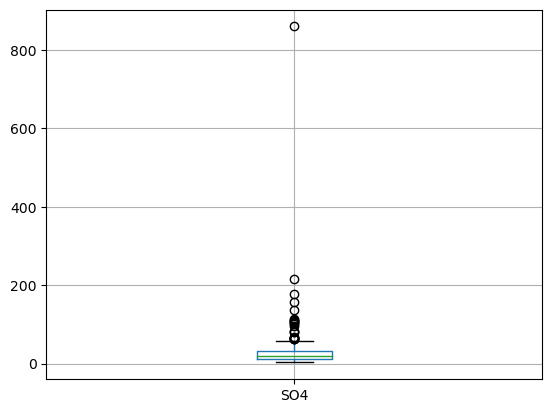

In [43]:
ground_water_df.boxplot(column=['SO4'])

#### Sodium Present (Na)

<Axes: >

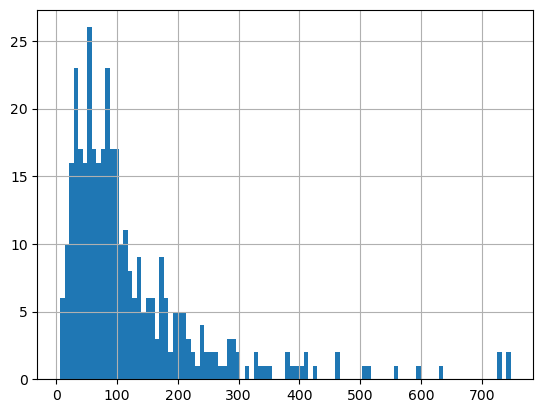

In [29]:
ground_water_df['Na'].hist(bins = 100)

<Axes: >

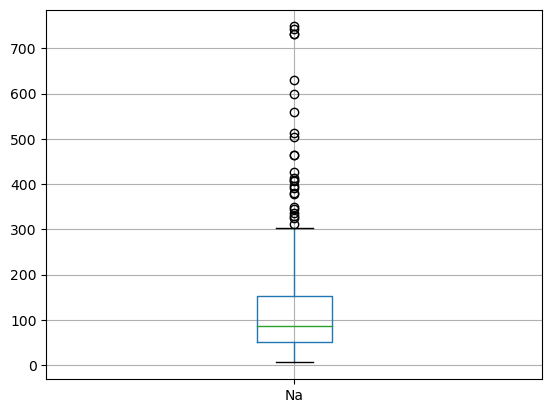

In [44]:
ground_water_df.boxplot(column=['Na'])

#### Potassium Present (K)

<Axes: >

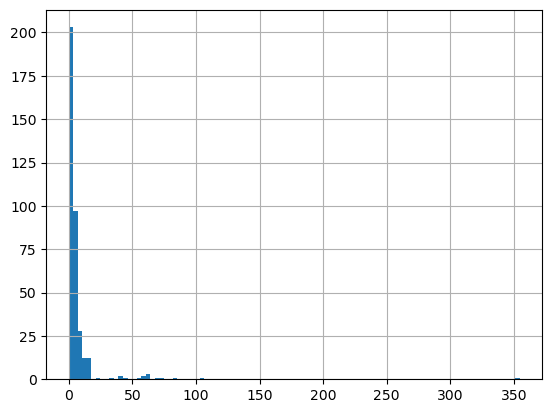

In [30]:
ground_water_df['K'].hist(bins = 100)

<Axes: >

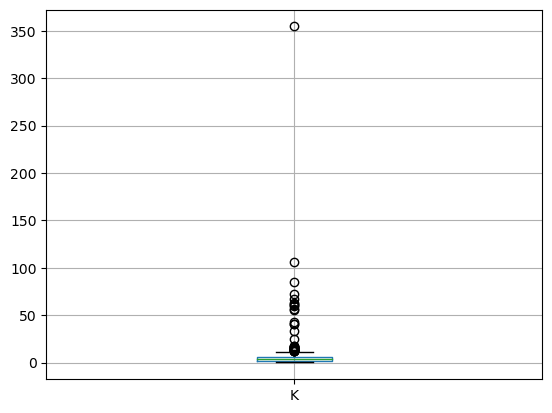

In [45]:
ground_water_df.boxplot(column=['K'])

#### Calcium Present (Ca)

<Axes: >

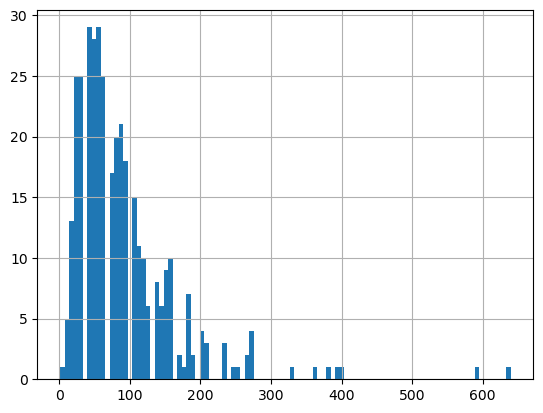

In [31]:
ground_water_df['Ca'].hist(bins = 100)

<Axes: >

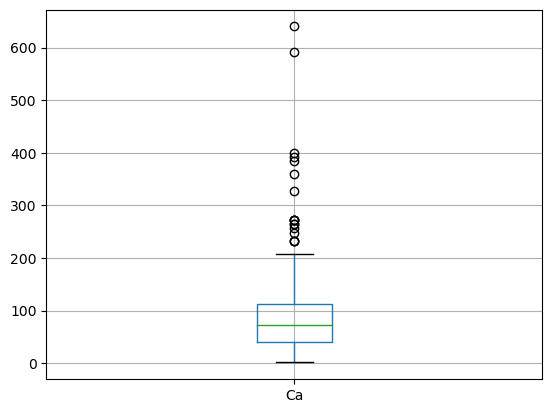

In [46]:
ground_water_df.boxplot(column=['Ca'])

#### Magnessium Present (Mg)

<Axes: >

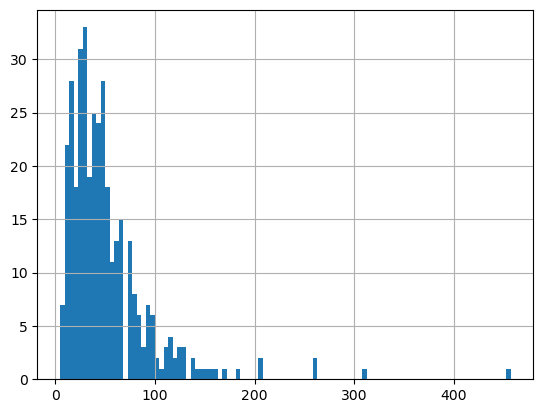

In [32]:
ground_water_df['Mg'].hist(bins = 100)

<Axes: >

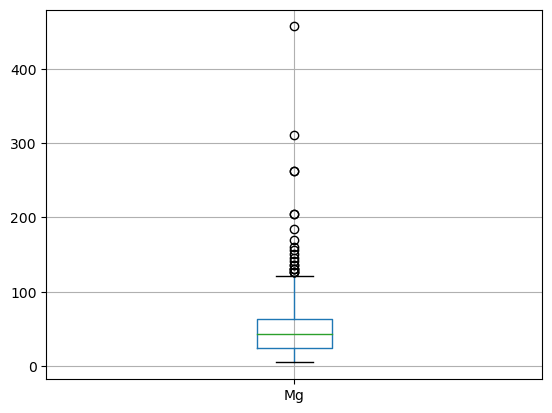

In [47]:
ground_water_df.boxplot(column=['Mg'])

#### Total Hardness (T.H)

<Axes: >

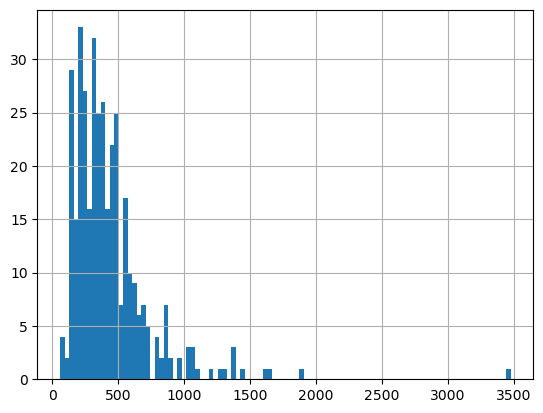

In [33]:
ground_water_df['T.H'].hist(bins = 100)

<Axes: >

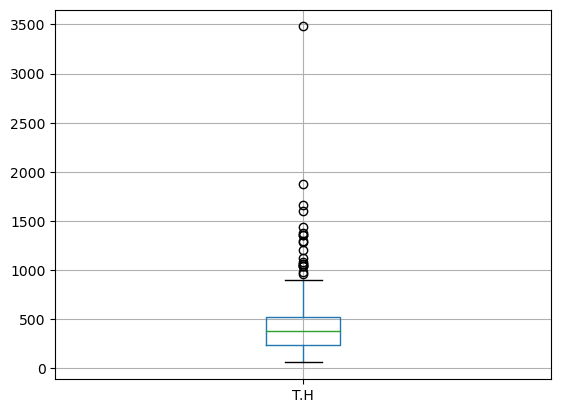

In [48]:
ground_water_df.boxplot(column=['T.H'])

#### Sodium Adsoption Ratio (SAR)

<Axes: >

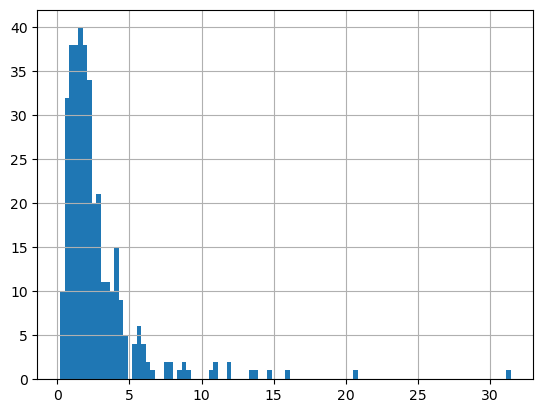

In [34]:
ground_water_df['SAR'].hist(bins = 100)

<Axes: >

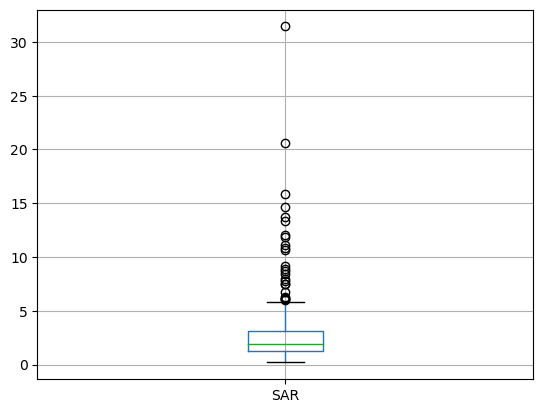

In [49]:
ground_water_df.boxplot(column=['SAR'])

#### Residual Sodium Carbonate (RSC)

<Axes: >

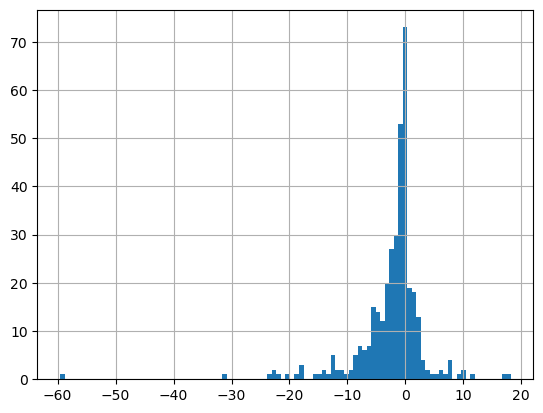

In [36]:
ground_water_df['RSC'].hist(bins = 100)

<Axes: >

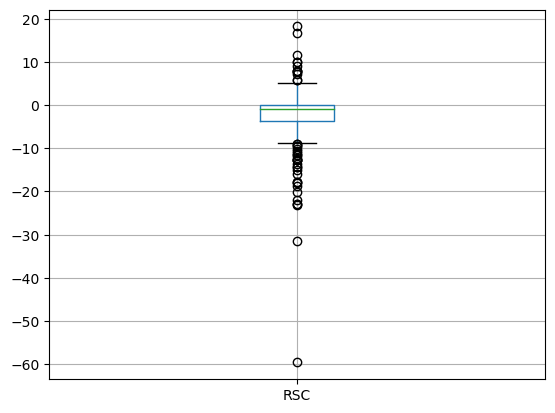

In [50]:
ground_water_df.boxplot(column=['RSC'])

#### Unnecessary Data


In [5]:
# 1 (irrelevant data)
num_rows = len(ground_water_df)

for col in ground_water_df.columns:
    cnts = ground_water_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

#deleted the season column (it's now commented out)
#ground_water_df = ground_water_df.drop(columns=['season'])


In [6]:
#  2 and 3 (repetitive and uninformative)
ground_water_df[ground_water_df.duplicated()]

,sno,district,mandal,village,lat_gis,long_gis,RL_GIS,pH,E.C,TDS,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
